**Collaboration Impact Analysis**

**This part is only for the gaming category and 2016-2019 period**

Is there a difference in popularity between collaborating and non-collaborating channels? Is there a correlation between video frequency and views/subscriptions that could potentially bias the study?

We will then do a comparison of popularity between people that collaborate and people who do not with t-tests (either Welch's t-test (insensitive to variance) or the Mann-Whitny U-test (non-parametric)). We will analyses the ten channels with the highest number of subscribers relative to the others to determine whether the differences in number of subscribers are significant for a greater number of collaborations. Plot the collaboration and non-collaboration graphs, with distribution graphs to examine skewness.

We will use visualizations, such as scatter plots, to initially assess the relationship between the number of videos posted and channel views/subscriptions. Then we will calculate basic statistics, examine correlation, using Pearson's correlation coefficient. 

Is there a cause-and-effect relationship? To answer this question we plan to examine linear regression to see how changes in video quantity affect views and subscribers. When analyzing the top ten subscribers, we will use effect size measures (such as Cohen's) to understand the practical significance of differences, not just statistical significance.

- Est ce que les collaborations ont un impact sur la popularité des youtubeurs
tableau avec les unique channel id et leur nombre de collab moyen par video
plot nombre de views en fct du nomre moyen de collab par video

- est ce que la frequence des videos est un confounder

- Est ce que les collaborations ont un impact sur  popularité des vidéos
videos qui ont des collab vs videos qui ont pas de collab pour un meme youtuber 


- Pour ceux qui font des collabs difference imact entre gros et petits youtubers

In [50]:
#Import 
import gzip
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import product
import re
import seaborn as sns
import scipy.stats as stats
import os

# regression / matching
import statsmodels.formula.api as smf
import networkx as nx
from collections import defaultdict

In [51]:
#Define configuration-related variables 
DATA_path_collab_per_week = "C:/Users/loudba/Documents/EPFL/Applied_data_analysis/ada-2023-project-adacadabra/processed_data/collaborators_per_week.csv"
DATA_path_collab_videos = "C:/Users/loudba/Documents/EPFL/Applied_data_analysis/ada-2023-project-adacadabra/processed_data/dataframe_collaborations_videos.csv"

DEFAULT_ENCODING = 'UTF8'


In [52]:
import os

# Specify the file name or path
file_name = 'collaborators_per_week.csv'

# Get the absolute path
file_path = os.path.abspath(file_name)

print("File path:", file_path)

File path: /Users/loudba/Documents/EPFL/Applied_data_analysis/ada-2023-project-adacadabra/collaborators_per_week.csv


In [53]:
# Read in data
def read_csv(file, chunk_size=30000): 
    file_path = os.path.join('/Users/loudba/Documents/EPFL/Applied_data_analysis/ada-2023-project-adacadabra/processed_data', file)
    chunk_list = []  # List to hold chunks
    for chunk in pd.read_csv(file_path, encoding=DEFAULT_ENCODING, chunksize=chunk_size):
        chunk_list.append(chunk)
    # Concatenate chunks into single DataFrame, if the csv had been close to the ram, it would be clever to put it in the loop. 
    df = pd.concat(chunk_list, ignore_index=True)
    return df

df_collab_videos = read_csv('dataframe_collaborations_videos.csv')
display(df_collab_videos)


,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,upload_date,view_count,final_collaborator_ids
0,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:25.790269,0.0,y5IvyZlzELs,3442,9.0,2016-09-26,1253.0,NaN
1,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:28.334071,0.0,m1agc0qT0BY,2407,8.0,2016-09-25,2311.0,NaN
2,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:32.174979,1.0,rr6tfbBA9iY,1820,11.0,2016-09-24,5596.0,NaN
3,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:25.379061,0.0,ZGll5_wD9Ys,1209,8.0,2016-09-21,792.0,NaN
4,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:26.020550,426.0,kYkokQgnu20,2053,2076.0,2016-09-21,1141393.0,NaN
...,...,...,...,...,...,...,...,...,...,...
9166272,Gaming,UCrwIEEqUWswVQ_L_VzfeR-Q,2019-11-11 17:26:06.375078,12.0,s6mBrPKvumc,558,368.0,2018-09-26,10397.0,"['UCmiLzX1rvItY08BJmjwWZjQ', 'UChEkBnuYDNrP8tg..."
9166273,Gaming,UCrwIEEqUWswVQ_L_VzfeR-Q,2019-11-11 17:26:07.025547,16.0,qneHrPX4_AY,363,574.0,2018-09-25,13954.0,"['UCmiLzX1rvItY08BJmjwWZjQ', 'UChEkBnuYDNrP8tg..."
9166274,Gaming,UCrwIEEqUWswVQ_L_VzfeR-Q,2019-11-11 17:26:07.684503,32.0,4H4Oz0Rjd70,713,596.0,2018-09-24,24198.0,"['UCmiLzX1rvItY08BJmjwWZjQ', 'UChEkBnuYDNrP8tg..."
9166275,Gaming,UCrwIEEqUWswVQ_L_VzfeR-Q,2019-11-11 17:26:08.371065,65.0,c_34mr0tXDk,1306,1301.0,2018-09-23,93020.0,"['UCmiLzX1rvItY08BJmjwWZjQ', 'UChEkBnuYDNrP8tg..."


In [54]:
df_collab_per_week = read_csv('collaborators_per_week.csv')
display(df_collab_per_week)

,Year-Week,channel_id,collaborators_in_week
0,2016-00,UC-0Wg1wOUp-bRF1ZiC0dE8g,NaN
1,2016-00,UC-1pADhAUignVbTbVCW4Uuw,['UChm3iPolG6IVrIQ3bc6bIuQ' 'UCYFn32jjeY0Rx6jx...
2,2016-00,UC-3Oc4KY7pElZMbsWtm3X6A,NaN
3,2016-00,UC-3wJqf60YbC6jzAfPRm2ig,NaN
4,2016-00,UC-46hTnlyW3aCwjHs2acDzg,[None 'ARLNoble' 'xMattyG1' 'tiametmarduk1']
...,...,...,...
1872846,2019-42,UCoaHAPh8BecD4qjwmuE96aw,UC0p1OMeCD9OPNmIWCfqdJ7w
1872847,2019-43,UCoaHAPh8BecD4qjwmuE96aw,UC0p1OMeCD9OPNmIWCfqdJ7w
1872848,2019-44,UCRIxiOJN0Xd3evqxRu4iXew,['albertsunzheng' 'MrCasping']
1872849,2019-44,UCoaHAPh8BecD4qjwmuE96aw,UC0p1OMeCD9OPNmIWCfqdJ7w


In [55]:
#Make copys: 
df_collab_per_week = df_collab_per_week.copy()
df_collab_videos.copy() 



,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,upload_date,view_count,final_collaborator_ids
0,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:25.790269,0.0,y5IvyZlzELs,3442,9.0,2016-09-26,1253.0,NaN
1,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:28.334071,0.0,m1agc0qT0BY,2407,8.0,2016-09-25,2311.0,NaN
2,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:32.174979,1.0,rr6tfbBA9iY,1820,11.0,2016-09-24,5596.0,NaN
3,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:25.379061,0.0,ZGll5_wD9Ys,1209,8.0,2016-09-21,792.0,NaN
4,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:26.020550,426.0,kYkokQgnu20,2053,2076.0,2016-09-21,1141393.0,NaN
...,...,...,...,...,...,...,...,...,...,...
9166272,Gaming,UCrwIEEqUWswVQ_L_VzfeR-Q,2019-11-11 17:26:06.375078,12.0,s6mBrPKvumc,558,368.0,2018-09-26,10397.0,"['UCmiLzX1rvItY08BJmjwWZjQ', 'UChEkBnuYDNrP8tg..."
9166273,Gaming,UCrwIEEqUWswVQ_L_VzfeR-Q,2019-11-11 17:26:07.025547,16.0,qneHrPX4_AY,363,574.0,2018-09-25,13954.0,"['UCmiLzX1rvItY08BJmjwWZjQ', 'UChEkBnuYDNrP8tg..."
9166274,Gaming,UCrwIEEqUWswVQ_L_VzfeR-Q,2019-11-11 17:26:07.684503,32.0,4H4Oz0Rjd70,713,596.0,2018-09-24,24198.0,"['UCmiLzX1rvItY08BJmjwWZjQ', 'UChEkBnuYDNrP8tg..."
9166275,Gaming,UCrwIEEqUWswVQ_L_VzfeR-Q,2019-11-11 17:26:08.371065,65.0,c_34mr0tXDk,1306,1301.0,2018-09-23,93020.0,"['UCmiLzX1rvItY08BJmjwWZjQ', 'UChEkBnuYDNrP8tg..."


popularite de la chaine en fct 
nmb moyen de collab par video par youtuber
views par suscribers

moyenne rapportée 

pas representatif 



une video 

sur toutes les videos le nombre de views rapportee au nombre de suscribers 


est ce que les videos avec collab son mieux recus-> views/video



est ce que les youtubers avec collab son mieux recus -> suscribers 

nombre de views en fct du nombre de collab rapportees au nombnre de videos

rapproter nomre de views au nombre de suscribers 

youtubers bcp de suscribers aui font des collabs et ceux qui ont peu de suscribers mais qui font des collabs




- Est ce que les collaborations ont un impact sur la popularité des youtubeurs
tableau avec les unique channel id et leur nombre de collab moyen par video
plot nombre de views en fct du nomre moyen de collab par video



,channel_id,mean_view_count,mean_final_collaboration_count
12333,UCPcynnZcILjm0e2aaaTuCjw,3.821617e+08,1.666667
5539,UCAxx_o1ClhGY0PBJZ7Ge3uA,5.006198e+07,2.000000
3559,UC6jvGhVm8JSCNwU1Y13BfZw,2.980671e+07,0.000000
19201,UCd4iew3AeLPRSCWwu2OitEw,2.532518e+07,0.000000
15845,UCWv_20ptZMar2TDswm6wYLg,2.358715e+07,0.000000
...,...,...,...
24330,UCnuzgY3qOvnjXumbV2vIj7w,1.138979e+01,0.000000
26603,UCssVEinRlfmSxXGsvMDNHPQ,1.100000e+01,0.000000
8571,UCHTnlUv7rDFz15XCO5vVi-Q,6.000000e+00,0.000000
19917,UCeeC8yDOjtFl-zE0jDOKrWg,4.000000e+00,0.000000


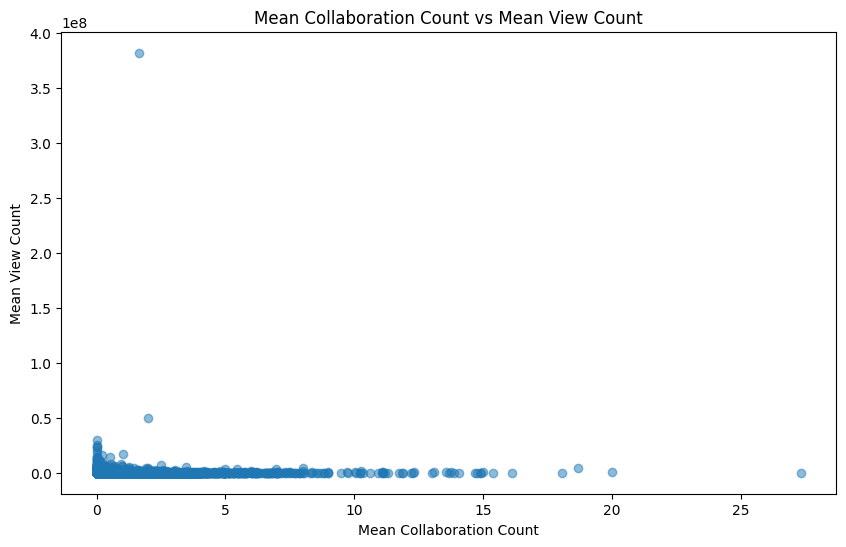

In [56]:
# Step 2: Collaboration Counts
df_collab_videos['collaboration_count'] = df_collab_videos['final_collaborator_ids'].apply(lambda x: 0 if pd.isna(x) else len(x.split(',')))
# Group the dataframe by channel_id and calculate the mean of view_count and final_collaborator_ids
new_table = df_collab_videos.groupby('channel_id').agg({
    'view_count': 'mean',
    'collaboration_count': 'mean'
}).reset_index()

# Rename the columns
new_table.columns = ['channel_id', 'mean_view_count', 'mean_final_collaboration_count']

new_table.sort_values('mean_view_count', ascending=False, inplace=True)
# Display the new table
display(new_table)

# Plot mean view count vs mean collaboration count
plt.figure(figsize=(10, 6))
plt.scatter(new_table['mean_final_collaboration_count'],new_table['mean_view_count'], alpha=0.5)
plt.xlabel('Mean Collaboration Count')
plt.ylabel('Mean View Count')
plt.title('Mean Collaboration Count vs Mean View Count')
plt.show()



Outliers :talking angela et

/var/folders/gx/bfgpp2gn7q9d5ddxfmsvdz080000gn/T/ipykernel_14004/2062744482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table_without_outliers.sort_values('mean_view_count', ascending=False, inplace=True)


,channel_id,mean_view_count,mean_final_collaboration_count
25741,UCqxgIQs2EwEuAppj4B2vVLA,6.799963e+06,2.500000
29770,UCz_yk8mDSAnxJq0ar66L4sw,6.675913e+06,0.000000
7563,UCFMOW7zjCVT7k3va5bHSYqg,6.665669e+06,0.333333
22519,UCkDbxGSyvOgR8UJj3m0GC6Q,6.664194e+06,0.000000
13053,UCR4s1DE9J4DHzZYXMltSMAg,6.529849e+06,0.000000
...,...,...,...
24330,UCnuzgY3qOvnjXumbV2vIj7w,1.138979e+01,0.000000
26603,UCssVEinRlfmSxXGsvMDNHPQ,1.100000e+01,0.000000
8571,UCHTnlUv7rDFz15XCO5vVi-Q,6.000000e+00,0.000000
19917,UCeeC8yDOjtFl-zE0jDOKrWg,4.000000e+00,0.000000


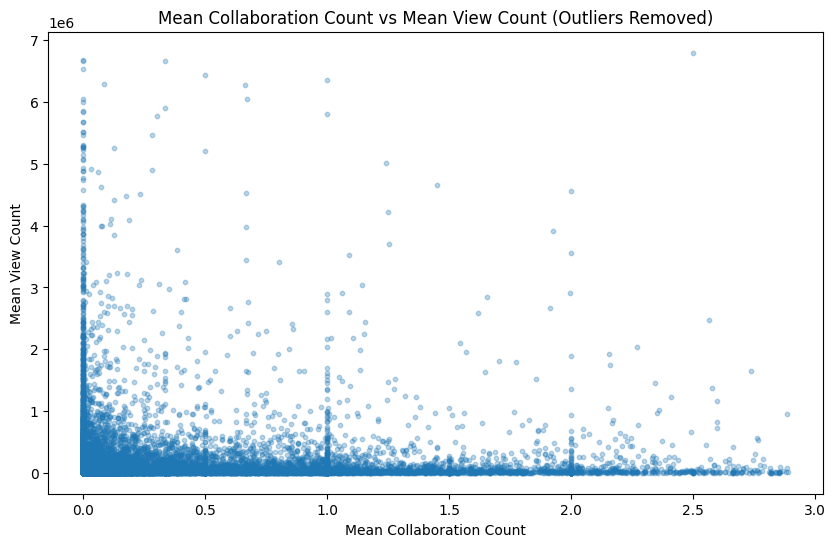

In [134]:
# Remove outliers using z-score
z_scores = stats.zscore(new_table[['mean_view_count', 'mean_final_collaboration_count']])
threshold = 3
new_table_without_outliers = new_table[(np.abs(z_scores) < threshold).all(axis=1)]

new_table_without_outliers.sort_values('mean_view_count', ascending=False, inplace=True)
# Display the new table
display(new_table_without_outliers)

# Plot mean view count vs mean collaboration count
plt.figure(figsize=(10, 6))
plt.scatter(new_table_without_outliers['mean_final_collaboration_count'],new_table_without_outliers['mean_view_count'], alpha=0.3, s =10)

plt.xlabel('Mean Collaboration Count')
plt.ylabel('Mean View Count') 
plt.title('Mean Collaboration Count vs Mean View Count (Outliers Removed)')
plt.show()




/var/folders/gx/bfgpp2gn7q9d5ddxfmsvdz080000gn/T/ipykernel_14004/4007973510.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table_without_outliers.sort_values('mean_view_count', ascending=False, inplace=True)


,channel_id,mean_view_count,mean_final_collaboration_count
25741,UCqxgIQs2EwEuAppj4B2vVLA,6.799963e+06,2.500000
29770,UCz_yk8mDSAnxJq0ar66L4sw,6.675913e+06,0.000000
7563,UCFMOW7zjCVT7k3va5bHSYqg,6.665669e+06,0.333333
22519,UCkDbxGSyvOgR8UJj3m0GC6Q,6.664194e+06,0.000000
13053,UCR4s1DE9J4DHzZYXMltSMAg,6.529849e+06,0.000000
...,...,...,...
24330,UCnuzgY3qOvnjXumbV2vIj7w,1.138979e+01,0.000000
26603,UCssVEinRlfmSxXGsvMDNHPQ,1.100000e+01,0.000000
8571,UCHTnlUv7rDFz15XCO5vVi-Q,6.000000e+00,0.000000
19917,UCeeC8yDOjtFl-zE0jDOKrWg,4.000000e+00,0.000000


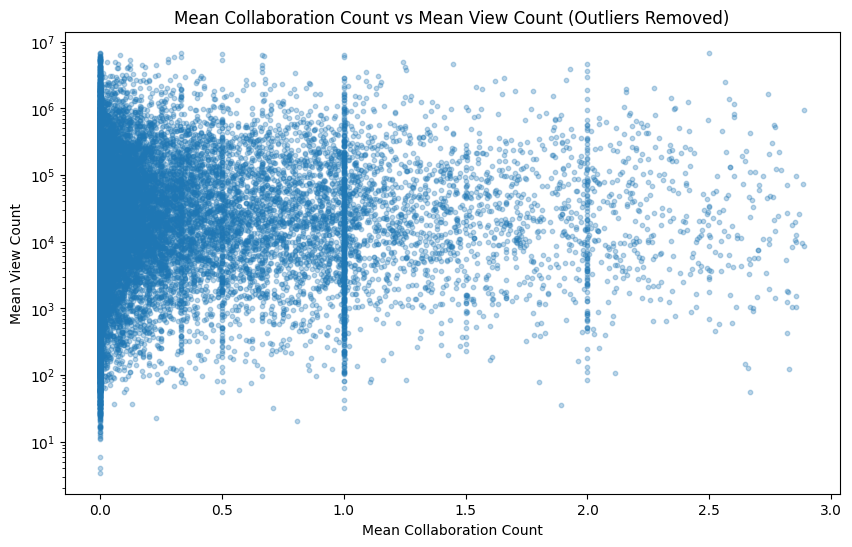

In [133]:
# Remove outliers using z-score
z_scores = stats.zscore(new_table[['mean_view_count', 'mean_final_collaboration_count']])
threshold = 3
new_table_without_outliers = new_table[(np.abs(z_scores) < threshold).all(axis=1)]

new_table_without_outliers.sort_values('mean_view_count', ascending=False, inplace=True)
# Display the new table
display(new_table_without_outliers)

# Plot mean view count vs mean collaboration count
plt.figure(figsize=(10, 6))
plt.scatter(new_table_without_outliers['mean_final_collaboration_count'],new_table_without_outliers['mean_view_count'], alpha=0.3, s=10)

plt.xlabel('Mean Collaboration Count')
plt.ylabel('Mean View Count') 
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Mean Collaboration Count vs Mean View Count (Outliers Removed)')
plt.show()




In [77]:
import scipy.stats as stats

# Separate channels with mean_collaboration_count of 0 and others
channels_with_zero_collab = new_table_without_outliers[new_table_without_outliers['mean_final_collaboration_count'] == 0]
channels_with_nonzero_collab = new_table_without_outliers[new_table_without_outliers['mean_final_collaboration_count'] > 0]

# Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(channels_with_zero_collab['mean_view_count'], channels_with_nonzero_collab['mean_view_count'], equal_var=False)
print(p_value)
# Check if the p-value is less than 0.05 (significance level)
if p_value < 0.05:
    print("There is a significant difference in the mean number of views between channels with mean_collaboration_count of 0 and others.")
else:
    print("There is no significant difference in the mean number of views between channels with mean_collaboration_count of 0 and others.")


0.5878659194080699
There is no significant difference in the mean number of views between channels with mean_collaboration_count of 0 and others.


Diviser la moyenne par rapport au nombre de subscribers car peut etre que les collabs ont pas d'impact pour les gros youtubers mais pour les petits oui mais c'est ecrase pcq bcp de subscribers implique beaucoup de vues

moyenne de views par au nombre de subscribers 


soit je divise par le nombre de subscribers soit je separe en ?? categories de petit a gros youtubers et je perform le ttest pour chaque categorie


nombre median 

First step meme analyse mais en divisant par le nombre de subscribers


In [59]:
### Initial definitions and loading of datasets

# dataset file paths
channels_path = './data/df_channels_en.tsv.gz'


# Define the start and end dates of our study
start_date = pd.Timestamp('2016-01-01')
end_date = pd.Timestamp('2019-12-31')

### loading datasets
df_channels = pd.read_csv(channels_path, sep ='\t',compression='gzip')


# convert dates into datetime format
df_channels['join_date'] = pd.to_datetime(df_channels['join_date'])



# channel_id = "UCkDbxGSyvOgR8UJj3m0GC6Q"
# is_in_df_channels = channel_id in df_channels["channel"].values
# print(is_in_df_channels)
# print(df_channels[df_channels['channel']=='UCkDbxGSyvOgR8UJj3m0GC6Q'])





# df_channels = df_channels[df_channels['category_cc']=='Gaming']
df_channels = df_channels[['channel', 'subscribers_cc']]
display(df_channels)




,channel,subscribers_cc
0,UC-lHJZR3Gqxm24_Vd_AJ5Yw,101000000
1,UCbCmjCuTUZos6Inko4u57UQ,60100000
2,UCpEhnqL0y41EpW2TvWAHD7Q,56018869
3,UC295-Dw_tDNtZXFeAPAW6Aw,60600000
4,UCJ5v_MCY6GNUBTO8-D3XoAg,48400000
...,...,...
136465,UCuM-9AajUOwKw6ipOzu2DRQ,10128
136466,UCtW9jp5TH0YrgYpwiRf9t-Q,10100
136467,UCTsxFTIUs8vFDzGccDm6i7Q,10000
136468,UC1HOArgRCMGPjlcmkThERwA,10000


In [60]:
merged_table = new_table.rename(columns={'channel_id': 'channel'}).merge(df_channels, left_on='channel', right_on='channel', how='left')

display(merged_table)

nan_subscribers = merged_table[merged_table['subscribers_cc'].isna()]

display(nan_subscribers)
print("Sum of mean view count for NaN subscribers: ", len(nan_subscribers))



,channel,mean_view_count,mean_final_collaboration_count,subscribers_cc
0,UCPcynnZcILjm0e2aaaTuCjw,3.821617e+08,1.666667,8470000
1,UCAxx_o1ClhGY0PBJZ7Ge3uA,5.006198e+07,2.000000,94600
2,UC6jvGhVm8JSCNwU1Y13BfZw,2.980671e+07,0.000000,963000
3,UCd4iew3AeLPRSCWwu2OitEw,2.532518e+07,0.000000,1950000
4,UCWv_20ptZMar2TDswm6wYLg,2.358715e+07,0.000000,759000
...,...,...,...,...
29951,UCnuzgY3qOvnjXumbV2vIj7w,1.138979e+01,0.000000,20000
29952,UCssVEinRlfmSxXGsvMDNHPQ,1.100000e+01,0.000000,11000
29953,UCHTnlUv7rDFz15XCO5vVi-Q,6.000000e+00,0.000000,10960
29954,UCeeC8yDOjtFl-zE0jDOKrWg,4.000000e+00,0.000000,13300


,channel,mean_view_count,mean_final_collaboration_count,subscribers_cc


Sum of mean view count for NaN subscribers:  0


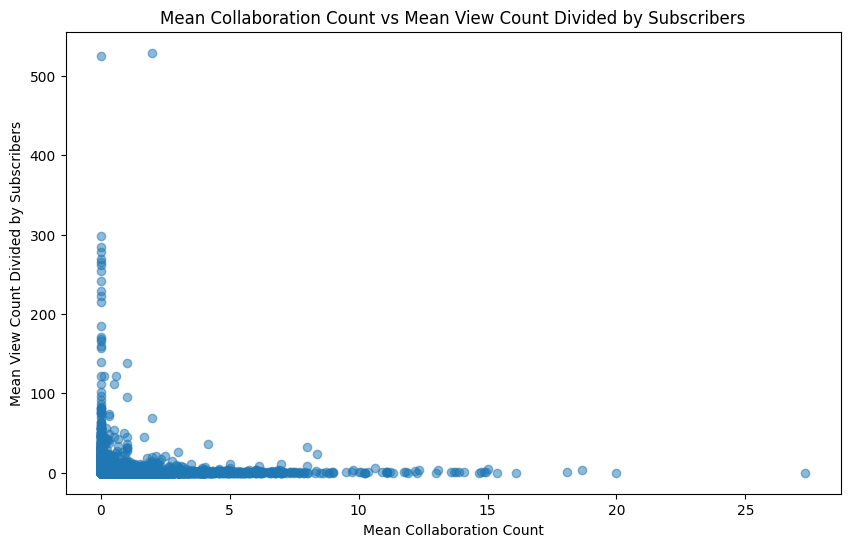

,channel,mean_view_count,mean_final_collaboration_count,subscribers_cc,mean_view_count_divided
0,UCPcynnZcILjm0e2aaaTuCjw,3.821617e+08,1.666667,8470000,45.119441
1,UCAxx_o1ClhGY0PBJZ7Ge3uA,5.006198e+07,2.000000,94600,529.196438
2,UC6jvGhVm8JSCNwU1Y13BfZw,2.980671e+07,0.000000,963000,30.951934
3,UCd4iew3AeLPRSCWwu2OitEw,2.532518e+07,0.000000,1950000,12.987270
4,UCWv_20ptZMar2TDswm6wYLg,2.358715e+07,0.000000,759000,31.076610
...,...,...,...,...,...
29951,UCnuzgY3qOvnjXumbV2vIj7w,1.138979e+01,0.000000,20000,0.000569
29952,UCssVEinRlfmSxXGsvMDNHPQ,1.100000e+01,0.000000,11000,0.001000
29953,UCHTnlUv7rDFz15XCO5vVi-Q,6.000000e+00,0.000000,10960,0.000547
29954,UCeeC8yDOjtFl-zE0jDOKrWg,4.000000e+00,0.000000,13300,0.000301


In [61]:
# Divide mean_view_count by subscribers_cc
merged_table['mean_view_count_divided'] = merged_table['mean_view_count'] / merged_table['subscribers_cc']

# Plot mean_view_count_divided vs mean_final_collaboration_count
plt.figure(figsize=(10, 6))
plt.scatter(merged_table['mean_final_collaboration_count'], merged_table['mean_view_count_divided'], alpha=0.5)
plt.xlabel('Mean Collaboration Count')
plt.ylabel('Mean View Count Divided by Subscribers')
plt.title('Mean Collaboration Count vs Mean View Count Divided by Subscribers')
plt.show()

display(merged_table)

/var/folders/gx/bfgpp2gn7q9d5ddxfmsvdz080000gn/T/ipykernel_14004/1044058348.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_table_without_outliers.sort_values('mean_view_count_divided', ascending=False, inplace=True)


,channel,mean_view_count,mean_final_collaboration_count,subscribers_cc,mean_view_count_divided
15,UCKf4vzRQJc9cVfaAYaZBS1w,1.223583e+07,0.000000,469925,26.037832
1716,UCsIY8_LtrvYb8KOk38sIQpg,4.279680e+05,0.000000,16500,25.937455
2323,UCGDi40PGE8daPgSGmkDc6nw,3.157064e+05,0.857143,12200,25.877576
307,UC9dxK-H6xnOaYgkA1GMtm0w,1.962768e+06,0.083333,76800,25.556870
2145,UCkwInUEQU7YdK4HVaRPJJ8w,3.421840e+05,0.571429,13500,25.346963
...,...,...,...,...,...
28383,UC-GAhNmY6bkuuRPUSaRI_oQ,3.524483e+02,0.000000,1790000,0.000197
29624,UCJCUbMaY593_4SN1QPG7NFQ,9.200000e+01,0.000000,525286,0.000175
29955,UCeneoV2NrGWGqyZcKAbbytg,3.433883e+00,0.000000,26800,0.000128
29881,UCdYjYt4YGhEbCGMv1fbv0pg,3.600000e+01,0.000000,287000,0.000125


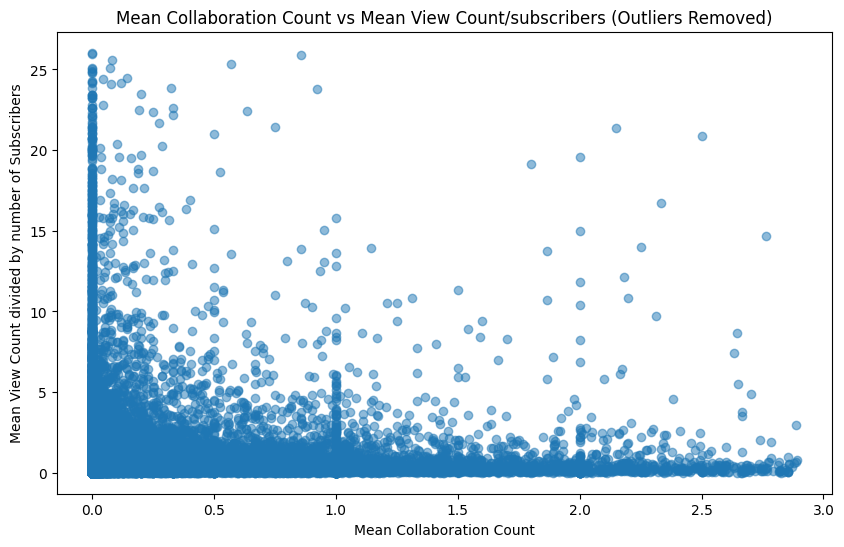

In [62]:
# Remove outliers using z-score
z_scores = stats.zscore(merged_table[['mean_view_count_divided', 'mean_final_collaboration_count']])
threshold = 3
merged_table_without_outliers = merged_table[(np.abs(z_scores) < threshold).all(axis=1)]

merged_table_without_outliers.sort_values('mean_view_count_divided', ascending=False, inplace=True)
# Display the new table
display(merged_table_without_outliers)

# Plot mean view count vs mean collaboration count
plt.figure(figsize=(10, 6))
plt.scatter(merged_table_without_outliers['mean_final_collaboration_count'],merged_table_without_outliers['mean_view_count_divided'], alpha=0.5)
plt.xlabel('Mean Collaboration Count')
plt.ylabel('Mean View Count divided by number of Subscribers')
plt.title('Mean Collaboration Count vs Mean View Count/subscribers (Outliers Removed)')
plt.show()

In [106]:
import scipy.stats as stats

# Separate channels with mean_collaboration_count of 0 and others
channels_with_zero_collab = merged_table_without_outliers[merged_table_without_outliers['mean_final_collaboration_count'] == 0]
channels_with_nonzero_collab = merged_table_without_outliers[merged_table_without_outliers['mean_final_collaboration_count'] > 0]

print(channels_with_zero_collab['mean_view_count_divided'].mean())
print(channels_with_nonzero_collab['mean_view_count_divided'].mean())

# Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(channels_with_zero_collab['mean_view_count_divided'], channels_with_nonzero_collab['mean_view_count_divided'], equal_var=False)
print(p_value)
# Check if the p-value is less than 0.05 (significance level)
if p_value < 0.05:
    print("There is a significant difference in the mean number of views between channels with mean_collaboration_count of 0 and others.")
else:
    print("There is no significant difference in the mean number of views between channels with mean_collaboration_count of 0 and others.")


1.1214919720343561
0.9123013875824635
7.049474179952724e-13
There is a significant difference in the mean number of views between channels with mean_collaboration_count of 0 and others.


ttest par bins ! 


SUITE 

Bin: (3.4330000000000003, 786.094]
Mean view count divided for channels with mean_collaboration_count of 0: 0.016794017806573636
Mean view count divided for channels with mean_collaboration_count of > 0: 0.02346812789647445
p-value: 1.6792615759297504e-21
len bin: 2926
There is a significant difference in the mean number of views between channels with mean_collaboration_count of 0 and others in this bin.

Bin: (786.094, 2397.867]
Mean view count divided for channels with mean_collaboration_count of 0: 0.06595915570858095
Mean view count divided for channels with mean_collaboration_count of > 0: 0.08493016237514282
p-value: 1.1733307707695254e-24
len bin: 2926
There is a significant difference in the mean number of views between channels with mean_collaboration_count of 0 and others in this bin.

Bin: (2397.867, 5156.174]
Mean view count divided for channels with mean_collaboration_count of 0: 0.14577873954333725
Mean view count divided for channels with mean_collaboration_count of > 0:

/var/folders/gx/bfgpp2gn7q9d5ddxfmsvdz080000gn/T/ipykernel_14004/1363533036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_table_without_outliers['mean_view_count_bin'] = pd.qcut(merged_table_without_outliers['mean_view_count'], q=10)
/var/folders/gx/bfgpp2gn7q9d5ddxfmsvdz080000gn/T/ipykernel_14004/1363533036.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for bin_label, bin_df in merged_table_without_outliers.groupby('mean_view_count_bin'):


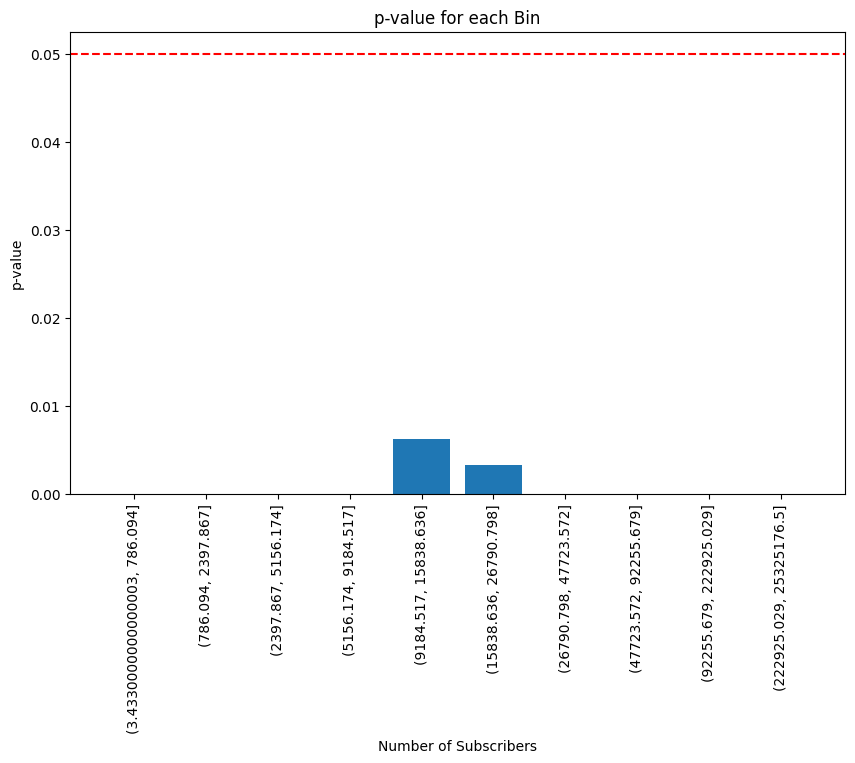

In [119]:
# Divide merged_table_without_outliers into 10 bins based on subscribers_cc
merged_table_without_outliers['mean_view_count_bin'] = pd.qcut(merged_table_without_outliers['mean_view_count'], q=10)

# Create a list to store the p-values
p_values = []
bin_labels = []

# Perform t-test for each bin
for bin_label, bin_df in merged_table_without_outliers.groupby('mean_view_count_bin'):
    channels_with_zero_collab = bin_df[bin_df['mean_final_collaboration_count'] == 0]
    channels_with_nonzero_collab = bin_df[bin_df['mean_final_collaboration_count'] > 0]
    
    # Perform Welch's t-test
    t_stat, p_value = stats.ttest_ind(channels_with_zero_collab['mean_view_count_divided'], channels_with_nonzero_collab['mean_view_count_divided'], equal_var=False)
    print("Bin:", bin_label)
    print("Mean view count divided for channels with mean_collaboration_count of 0:", channels_with_zero_collab['mean_view_count_divided'].mean())
    print("Mean view count divided for channels with mean_collaboration_count of > 0:", channels_with_nonzero_collab['mean_view_count_divided'].mean())
    print("p-value:", p_value)
    print("len bin:", len(bin_df))
    if p_value < 0.05:
        print("There is a significant difference in the mean number of views between channels with mean_collaboration_count of 0 and others in this bin.")
    else:
        print("There is no significant difference in the mean number of views between channels with mean_collaboration_count of 0 and others in this bin.")
    print()
    
    # Append the p-value to the list
    p_values.append(p_value)
    bin_labels.append(str(bin_label))


# Plot the p-values
plt.figure(figsize=(10, 6))
plt.bar(bin_labels, p_values)
plt.axhline(y=0.05, color='red', linestyle='--')
plt.xlabel('Number of Subscribers')
plt.ylabel('p-value')
plt.title('p-value for each Bin')

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

plt.show()



In [ ]:
# Divide merged_table_without_outliers into 10 bins based on subscribers_cc
merged_table_without_outliers['subscribers_bin'] = pd.qcut(merged_table_without_outliers['subscribers_cc'], q=2)

# Perform t-test for each bin
for bin_label, bin_df in merged_table_without_outliers.groupby('subscribers_bin'):
    channels_with_zero_collab = bin_df[bin_df['mean_final_collaboration_count'] == 0]
    channels_with_nonzero_collab = bin_df[bin_df['mean_final_collaboration_count'] > 0]
    
    # Perform Welch's t-test
    t_stat, p_value = stats.ttest_ind(channels_with_zero_collab['mean_view_count_divided'], channels_with_nonzero_collab['mean_view_count_divided'], equal_var=False)
    
    print("Bin:", bin_label)
    print("p-value:", p_value)
    print("len bin:", len(bin_df))
    if p_value < 0.05:
        print("There is a significant difference in the mean number of views between channels with mean_collaboration_count of 0 and others in this bin.")
    else:
        print("There is no significant difference in the mean number of views between channels with mean_collaboration_count of 0 and others in this bin.")
    print()

gros youtubers

In [116]:
merged_table_without_outliers.sort_values('subscribers_cc', ascending=False, inplace=True)
display(merged_table_without_outliers)


/var/folders/gx/bfgpp2gn7q9d5ddxfmsvdz080000gn/T/ipykernel_14004/1827137991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_table_without_outliers.sort_values('subscribers_cc', ascending=False, inplace=True)


,channel,mean_view_count,mean_final_collaboration_count,subscribers_cc,mean_view_count_divided,subscribers_bin
6799,UCq-Fj5jknLsUf-MWSy4_brA,7.959700e+04,0.000000,112139463,0.000710,"(100926516.7, 112139463.0]"
30,UC-lHJZR3Gqxm24_Vd_AJ5Yw,7.626555e+06,0.565972,101000000,0.075510,"(100926516.7, 112139463.0]"
3696,UCJ5v_MCY6GNUBTO8-D3XoAg,1.862026e+05,0.010753,48400000,0.003847,"(44861785.2, 56074731.5]"
466,UCEdvpU2pFRCVqU6yIPyTpMQ,1.437037e+06,0.303030,39100000,0.036753,"(33648838.9, 44861785.2]"
300,UC4rlAVgAK0SGk-yTfe48Qpw,1.990862e+06,0.000000,29800000,0.066807,"(22435892.6, 33648838.9]"
...,...,...,...,...,...,...
26659,UCtGVHScAwyUVOUbUASM8a3A,9.087353e+02,0.000000,10000,0.090874,"(-102129.463, 11222946.3]"
12513,UCflCR1uxwq3zbbNA-KXs9zQ,2.490682e+04,0.000000,10000,2.490682,"(-102129.463, 11222946.3]"
18590,UC-njwIOSrdj_RJd4JWXMrcA,8.429827e+03,1.443878,10000,0.842983,"(-102129.463, 11222946.3]"
26685,UCSV_0D_bOCHfXByffpadINg,8.976733e+02,0.000000,10000,0.089767,"(-102129.463, 11222946.3]"


videos pour un gros youtuber

Bin: (3.4330000000000003, 791.191]
Mean view count divided for channels with mean_collaboration_count of 0: 339.51422403648075
Mean view count divided for channels with mean_collaboration_count of > 0: 401.9365219023488
p-value: 1.8537374406662203e-12
len bin: 2940
There is a significant difference in the mean number of views between channels with mean_collaboration_count of 0 and others in this bin.

Bin: (791.191, 2420.333]
Mean view count divided for channels with mean_collaboration_count of 0: 1478.3353319104779
Mean view count divided for channels with mean_collaboration_count of > 0: 1541.641782343516
p-value: 0.00027453750456465567
len bin: 2941
There is a significant difference in the mean number of views between channels with mean_collaboration_count of 0 and others in this bin.

Bin: (2420.333, 5198.203]
Mean view count divided for channels with mean_collaboration_count of 0: 3688.7371199800905
Mean view count divided for channels with mean_collaboration_count of > 0: 3745.75

/var/folders/gx/bfgpp2gn7q9d5ddxfmsvdz080000gn/T/ipykernel_14004/925306768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table_without_outliers['mean_view_count_bin'] = pd.qcut(new_table_without_outliers['mean_view_count'], q=10)
/var/folders/gx/bfgpp2gn7q9d5ddxfmsvdz080000gn/T/ipykernel_14004/925306768.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for bin_label, bin_df in new_table_without_outliers.groupby('mean_view_count_bin'):


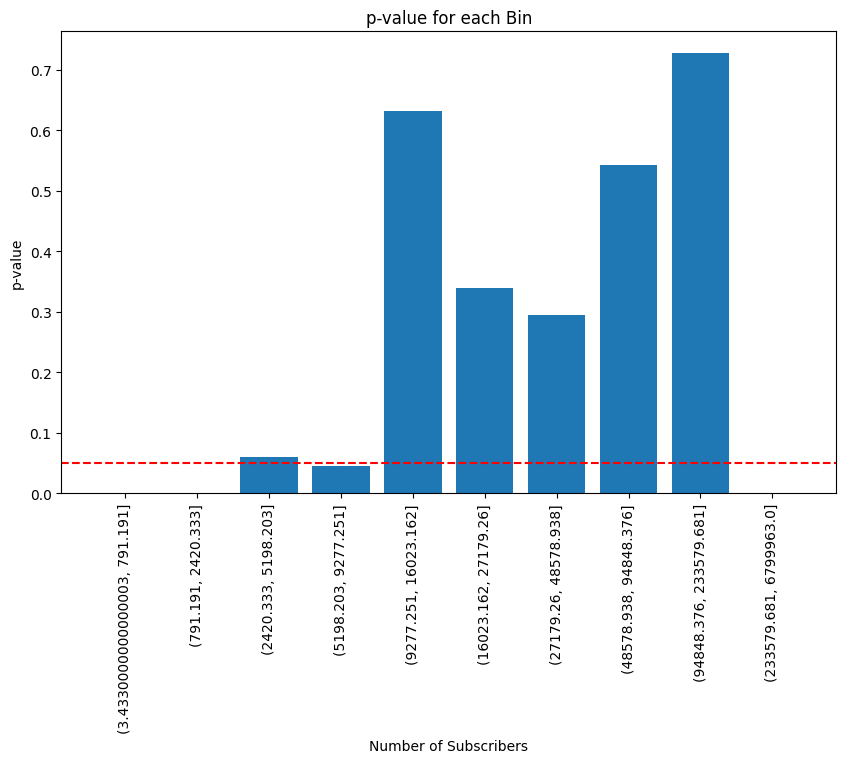

In [121]:
# Divide merged_table_without_outliers into 10 bins based on subscribers_cc
new_table_without_outliers['mean_view_count_bin'] = pd.qcut(new_table_without_outliers['mean_view_count'], q=10)

# Create a list to store the p-values
p_values = []
bin_labels = []

# Perform t-test for each bin
for bin_label, bin_df in new_table_without_outliers.groupby('mean_view_count_bin'):
    channels_with_zero_collab = bin_df[bin_df['mean_final_collaboration_count'] == 0]
    channels_with_nonzero_collab = bin_df[bin_df['mean_final_collaboration_count'] > 0]
    
    # Perform Welch's t-test
    t_stat, p_value = stats.ttest_ind(channels_with_zero_collab['mean_view_count'], channels_with_nonzero_collab['mean_view_count'], equal_var=False)
    print("Bin:", bin_label)
    print("Mean view count divided for channels with mean_collaboration_count of 0:", channels_with_zero_collab['mean_view_count'].mean())
    print("Mean view count divided for channels with mean_collaboration_count of > 0:", channels_with_nonzero_collab['mean_view_count'].mean())
    print("p-value:", p_value)
    print("len bin:", len(bin_df))
    if p_value < 0.05:
        print("There is a significant difference in the mean number of views between channels with mean_collaboration_count of 0 and others in this bin.")
    else:
        print("There is no significant difference in the mean number of views between channels with mean_collaboration_count of 0 and others in this bin.")
    print()
    
    # Append the p-value to the list
    p_values.append(p_value)
    bin_labels.append(str(bin_label))


# Plot the p-values
plt.figure(figsize=(10, 6))
plt.bar(bin_labels, p_values)
plt.axhline(y=0.05, color='red', linestyle='--')
plt.xlabel('Number of Subscribers')
plt.ylabel('p-value')
plt.title('p-value for each Bin')

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

plt.show()


In [123]:
new_table_without_outliers.sort_values('mean_view_count', ascending=False, inplace=True)
display(new_table_without_outliers)


/var/folders/gx/bfgpp2gn7q9d5ddxfmsvdz080000gn/T/ipykernel_14004/62609457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_table_without_outliers.sort_values('mean_view_count', ascending=False, inplace=True)


,channel_id,mean_view_count,mean_final_collaboration_count,mean_view_count_bin
25741,UCqxgIQs2EwEuAppj4B2vVLA,6.799963e+06,2.500000,"(233579.681, 6799963.0]"
29770,UCz_yk8mDSAnxJq0ar66L4sw,6.675913e+06,0.000000,"(233579.681, 6799963.0]"
7563,UCFMOW7zjCVT7k3va5bHSYqg,6.665669e+06,0.333333,"(233579.681, 6799963.0]"
22519,UCkDbxGSyvOgR8UJj3m0GC6Q,6.664194e+06,0.000000,"(233579.681, 6799963.0]"
13053,UCR4s1DE9J4DHzZYXMltSMAg,6.529849e+06,0.000000,"(233579.681, 6799963.0]"
...,...,...,...,...
24330,UCnuzgY3qOvnjXumbV2vIj7w,1.138979e+01,0.000000,"(3.4330000000000003, 791.191]"
26603,UCssVEinRlfmSxXGsvMDNHPQ,1.100000e+01,0.000000,"(3.4330000000000003, 791.191]"
8571,UCHTnlUv7rDFz15XCO5vVi-Q,6.000000e+00,0.000000,"(3.4330000000000003, 791.191]"
19917,UCeeC8yDOjtFl-zE0jDOKrWg,4.000000e+00,0.000000,"(3.4330000000000003, 791.191]"


2 cases study : choisir 2 mecs avec comme condition qu'ils aient fait au moins 2 videos (une sans collab et une avec collab) et regarder impact (idealement un tres naz et un tres fort)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


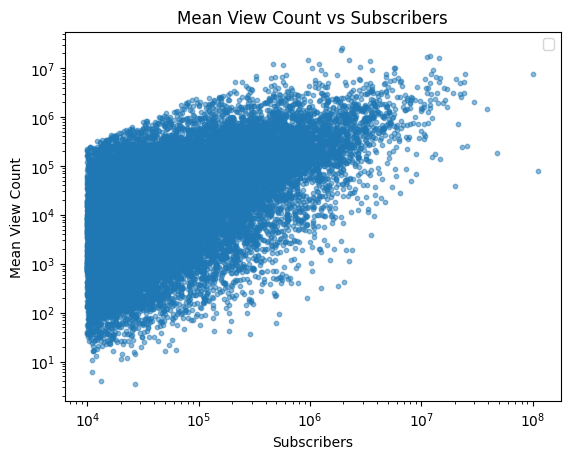

In [150]:


plt.scatter(merged_table_without_outliers['subscribers_cc'], merged_table_without_outliers['mean_view_count'], alpha=0.5, s=10)
plt.xlabel('Subscribers')
plt.ylabel('Mean View Count')

plt.xscale('log')
plt.yscale('log')
plt.title('Mean View Count vs Subscribers')
plt.legend()

plt.show()


